# UNIÓN DE DATAFRAME CON DATOS METEOROLÓGICOS

En este notebook, trabajaremos en la unión de un conjunto de datos que contiene información meteorológica y con los otros que contienen información hidrológica trabajados en los anteriores notebook. El objetivo es analizar las correlaciones entre los diferentes parámetros, incluyendo la dosis de coagulante, la velocidad del viento, la precipitación, la temperatura seca y la temperatura húmeda. Este análisis nos ayudará a entender mejor las relaciones entre estos parámetros y cómo afectan a la calidad del agua.

## CREACIÓN DATAFRAME DATOS METEOROLÓGICOS

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
# Definimos las cabeceras de los datos que serán leídos
HEADERS = [
    'Fecha',
    'NombreEstacion',
    'Etiqueta',
    'DescripcionSerie',
    'Frecuencia',
    'Valor'
]

Se realiza la lectura de los datos meteorológicos tomados de la base de datos del IDEAM

In [3]:
# Leer los datos meteorológicos del archivo CSV
df = pd.read_csv('../data/meteorologicos.csv', usecols=HEADERS)
df

,NombreEstacion,Etiqueta,DescripcionSerie,Frecuencia,Fecha,Valor
0,EL TABLAZO - AUT [26015010],VV_10_MEDIA_H,Velocidad 10 minutal del viento media horaria,Horaria,2013-01-17 12:00,2.200
1,EL TABLAZO - AUT [26015010],VV_10_MEDIA_H,Velocidad 10 minutal del viento media horaria,Horaria,2013-01-17 12:00,2.200
2,EL TABLAZO - AUT [26015010],VV_10_MEDIA_H,Velocidad 10 minutal del viento media horaria,Horaria,2013-01-17 12:00,2.200
3,EL TABLAZO - AUT [26015010],VV_10_MEDIA_H,Velocidad 10 minutal del viento media horaria,Horaria,2013-01-17 12:00,2.200
4,EL TABLAZO - AUT [26015010],VV_10_MEDIA_H,Velocidad 10 minutal del viento media horaria,Horaria,2013-01-17 18:00,1.025
...,...,...,...,...,...,...
1110811,AEROPUERTO G L VALENCIA [26035030],THSM_CON,"Temperatura húmeda de las 700, 1300 y 1800",Horaria,2022-12-31 13:00,16.800
1110812,AEROPUERTO G L VALENCIA [26035030],THSM_CON,"Temperatura húmeda de las 700, 1300 y 1800",Horaria,2022-12-31 18:00,16.000
1110813,AEROPUERTO G L VALENCIA [26035030],THSM_CON,"Temperatura húmeda de las 700, 1300 y 1800",Horaria,2022-12-31 18:00,16.000
1110814,AEROPUERTO G L VALENCIA [26035030],THSM_CON,"Temperatura húmeda de las 700, 1300 y 1800",Horaria,2022-12-31 18:00,16.000


In [4]:
# Ver las categorías existentes en la columna 'Etiqueta'
df.Etiqueta.value_counts()

VV_10_MEDIA_H    564144
PT_10_TT_H       413512
TSSM_CON          78056
THSM_CON          55104
Name: Etiqueta, dtype: int64

En el análisis previo, identificamos cuatro etiquetas distintas, cada una representando uno de los parámetros que se investigarán. Estos parámetros incluyen la velocidad del viento y la precipitación, que provienen de datos recopilados en la estación situada en la planta de El Tablazo, así como la temperatura seca y la temperatura húmeda, que se obtienen de la estación ubicada en el aeropuerto de la ciudad. 

Para poder llevar a cabo nuestro análisis de manera eficiente, hemos decidido separar el dataframe original en cuatro dataframes distintos, cada uno de los cuales contendrá información correspondiente a un parámetro específico. De esta manera, podremos unir los dataframes individuales con el dataframe principal de datos hidrológicos más adelante y llevar a cabo un análisis más detallado y completo.

In [5]:
# Crear dataframes separados para cada etiqueta (parámetro meteorológico)
velocidad_viento = df[df.Etiqueta=='VV_10_MEDIA_H']
precipitacion = df[df.Etiqueta=='PT_10_TT_H']
temperatura_seca = df[df.Etiqueta=='TSSM_CON']
temperatura_humeda = df[df.Etiqueta=='THSM_CON']

In [6]:
# Definimos una función para eliminar duplicados basándose en la fecha
def drop_dup(df):
    df = df.drop_duplicates(subset='Fecha')
    return df

In [7]:
# Aplicamos la función para eliminar duplicados a cada dataframe
velocidad_viento = drop_dup(velocidad_viento)
precipitacion = drop_dup(precipitacion)
temperatura_seca = drop_dup(temperatura_seca)
temperatura_humeda = drop_dup(temperatura_humeda)

In [8]:
velocidad_viento

,NombreEstacion,Etiqueta,DescripcionSerie,Frecuencia,Fecha,Valor
0,EL TABLAZO - AUT [26015010],VV_10_MEDIA_H,Velocidad 10 minutal del viento media horaria,Horaria,2013-01-17 12:00,2.200000
4,EL TABLAZO - AUT [26015010],VV_10_MEDIA_H,Velocidad 10 minutal del viento media horaria,Horaria,2013-01-17 18:00,1.025000
8,EL TABLAZO - AUT [26015010],VV_10_MEDIA_H,Velocidad 10 minutal del viento media horaria,Horaria,2013-01-17 20:00,0.750000
12,EL TABLAZO - AUT [26015010],VV_10_MEDIA_H,Velocidad 10 minutal del viento media horaria,Horaria,2013-01-18 00:00,1.037500
16,EL TABLAZO - AUT [26015010],VV_10_MEDIA_H,Velocidad 10 minutal del viento media horaria,Horaria,2013-01-18 03:00,1.100000
...,...,...,...,...,...,...
282052,EL TABLAZO - AUT [26015010],VV_10_MEDIA_H,Velocidad 10 minutal del viento media horaria,Horaria,2022-10-19 00:00,0.875000
282056,EL TABLAZO - AUT [26015010],VV_10_MEDIA_H,Velocidad 10 minutal del viento media horaria,Horaria,2022-10-19 01:00,0.916667
282060,EL TABLAZO - AUT [26015010],VV_10_MEDIA_H,Velocidad 10 minutal del viento media horaria,Horaria,2022-10-19 02:00,0.841667
282064,EL TABLAZO - AUT [26015010],VV_10_MEDIA_H,Velocidad 10 minutal del viento media horaria,Horaria,2022-10-19 03:00,1.175000


In [9]:
precipitacion

,NombreEstacion,Etiqueta,DescripcionSerie,Frecuencia,Fecha,Valor
282072,EL TABLAZO - AUT [26015010],PT_10_TT_H,Precipitación total horaria,Horaria,2016-11-25 13:00,0.0
282076,EL TABLAZO - AUT [26015010],PT_10_TT_H,Precipitación total horaria,Horaria,2016-11-25 14:00,7.2
282080,EL TABLAZO - AUT [26015010],PT_10_TT_H,Precipitación total horaria,Horaria,2016-11-25 15:00,6.0
282084,EL TABLAZO - AUT [26015010],PT_10_TT_H,Precipitación total horaria,Horaria,2016-11-25 16:00,1.2
282088,EL TABLAZO - AUT [26015010],PT_10_TT_H,Precipitación total horaria,Horaria,2016-11-25 17:00,0.5
...,...,...,...,...,...,...
488808,EL TABLAZO - AUT [26015010],PT_10_TT_H,Precipitación total horaria,Horaria,2022-10-19 01:00,0.0
488812,EL TABLAZO - AUT [26015010],PT_10_TT_H,Precipitación total horaria,Horaria,2022-10-19 02:00,0.0
488816,EL TABLAZO - AUT [26015010],PT_10_TT_H,Precipitación total horaria,Horaria,2022-10-19 03:00,0.0
488820,EL TABLAZO - AUT [26015010],PT_10_TT_H,Precipitación total horaria,Horaria,2022-10-19 04:00,0.0


In [10]:
temperatura_seca

,NombreEstacion,Etiqueta,DescripcionSerie,Frecuencia,Fecha,Valor
977656,AEROPUERTO G L VALENCIA [26035030],TSSM_CON,"Temperatura seca de las 700, 1300 y 1800",Horaria,2013-01-01 07:00,13.6
977660,AEROPUERTO G L VALENCIA [26035030],TSSM_CON,"Temperatura seca de las 700, 1300 y 1800",Horaria,2013-01-01 13:00,25.0
977664,AEROPUERTO G L VALENCIA [26035030],TSSM_CON,"Temperatura seca de las 700, 1300 y 1800",Horaria,2013-01-01 18:00,20.0
977668,AEROPUERTO G L VALENCIA [26035030],TSSM_CON,"Temperatura seca de las 700, 1300 y 1800",Horaria,2013-01-02 07:00,13.2
977672,AEROPUERTO G L VALENCIA [26035030],TSSM_CON,"Temperatura seca de las 700, 1300 y 1800",Horaria,2013-01-02 13:00,24.8
...,...,...,...,...,...,...
1016664,AEROPUERTO G L VALENCIA [26035030],TSSM_CON,"Temperatura seca de las 700, 1300 y 1800",Horaria,2022-12-30 07:00,13.0
1016668,AEROPUERTO G L VALENCIA [26035030],TSSM_CON,"Temperatura seca de las 700, 1300 y 1800",Horaria,2022-12-30 18:00,18.4
1016672,AEROPUERTO G L VALENCIA [26035030],TSSM_CON,"Temperatura seca de las 700, 1300 y 1800",Horaria,2022-12-31 07:00,15.0
1016676,AEROPUERTO G L VALENCIA [26035030],TSSM_CON,"Temperatura seca de las 700, 1300 y 1800",Horaria,2022-12-31 13:00,19.0


In [11]:
temperatura_humeda

,NombreEstacion,Etiqueta,DescripcionSerie,Frecuencia,Fecha,Valor
1016684,AEROPUERTO G L VALENCIA [26035030],THSM_CON,"Temperatura húmeda de las 700, 1300 y 1800",Horaria,2013-01-01 07:00,13.0
1016688,AEROPUERTO G L VALENCIA [26035030],THSM_CON,"Temperatura húmeda de las 700, 1300 y 1800",Horaria,2013-01-01 13:00,18.0
1016692,AEROPUERTO G L VALENCIA [26035030],THSM_CON,"Temperatura húmeda de las 700, 1300 y 1800",Horaria,2013-01-01 18:00,18.0
1016696,AEROPUERTO G L VALENCIA [26035030],THSM_CON,"Temperatura húmeda de las 700, 1300 y 1800",Horaria,2013-01-02 07:00,12.0
1016700,AEROPUERTO G L VALENCIA [26035030],THSM_CON,"Temperatura húmeda de las 700, 1300 y 1800",Horaria,2013-01-02 13:00,18.0
...,...,...,...,...,...,...
1044216,AEROPUERTO G L VALENCIA [26035030],THSM_CON,"Temperatura húmeda de las 700, 1300 y 1800",Horaria,2022-12-29 18:00,17.0
1044220,AEROPUERTO G L VALENCIA [26035030],THSM_CON,"Temperatura húmeda de las 700, 1300 y 1800",Horaria,2022-12-30 07:00,12.4
1044224,AEROPUERTO G L VALENCIA [26035030],THSM_CON,"Temperatura húmeda de las 700, 1300 y 1800",Horaria,2022-12-30 18:00,16.8
1044228,AEROPUERTO G L VALENCIA [26035030],THSM_CON,"Temperatura húmeda de las 700, 1300 y 1800",Horaria,2022-12-31 13:00,16.8


In [12]:
# Se crea una función para contar la cantidad de datos por año
def cant_año(df):
    df['Fecha'] = pd.to_datetime(df['Fecha'])
    # Extraer el año de cada fecha
    df['Año'] = df['Fecha'].dt.year
    # Contar la cantidad de datos por año
    datos_por_año = df['Año'].value_counts()
    return datos_por_año

In [13]:
# Aplicamos la función a cada dataframe
vv_por_año = cant_año(velocidad_viento)
prec_por_año = cant_año(precipitacion)
ts_por_año = cant_año(temperatura_seca)
th_por_año = cant_año(temperatura_humeda)

In [14]:
# Visualizamos la cantidad de datos por año de cada dataframe
print('Velocidad del viento por año:\n', vv_por_año)
print('Precipitación por año:\n', prec_por_año)
print('Temperatura seca por año:\n', ts_por_año)
print('Temperatura húmeda por año:\n', th_por_año)

Velocidad del viento por año:
 2019    8759
2017    8758
2018    8757
2016    8658
2014    8532
2015    8163
2013    7847
2022    4330
2020    3444
2021    3270
Name: Año, dtype: int64
Precipitación por año:
 2020    8784
2017    8760
2018    8760
2019    8760
2021    8760
2022    6990
2016     875
Name: Año, dtype: int64
Temperatura seca por año:
 2013    1086
2014    1083
2021    1081
2022    1065
2019     983
2017     980
2015     974
2016     927
2018     854
2020     723
Name: Año, dtype: int64
Temperatura húmeda por año:
 2019    981
2017    976
2021    950
2016    921
2022    918
2018    843
2013    569
2015    439
2020    291
Name: Año, dtype: int64


Se procede con la división de la columna 'Fecha' en fecha y hora, puesto que estas dos columnas seran nuestras columnas de referencia al realizar la fusión con los dataframes de parámetros hidrológicos.

In [15]:
# Función para dividir la fecha y la hora en dos columnas separadas
def fecha_hora(df,nombre):
    # Convertir la columna de fecha a tipo str
    df['Fecha'] = df['Fecha'].astype(str)

    # Separar la columna de fecha y hora
    df['Fecha_nueva'] = df['Fecha'].str.split(' ').str[0]
    df['Hora'] = df['Fecha'].str.split(' ').str[1]

    # Convertir la columna de fecha a tipo datetime
    df['Fecha_nueva'] = pd.to_datetime(df['Fecha_nueva'])

    # Convertir la columna de hora a tipo int
    df['Hora'] = df['Hora'].str.split(':').str[0].astype(int)

    # Ajustar las horas según lo requerido
    df.loc[df['Hora'] == 0, 'Hora'] = 24

    # Formatear la columna de fecha y la columna de hora según lo requerido
    df['Fecha_nueva'] = df['Fecha_nueva'].dt.strftime('%Y-%m-%d')
    df['Hora'] = df['Hora'].astype('int64')

    # Eliminar la columna 'Fecha' original
    df = df.drop('Fecha', axis=1)
    
    # Renombrar la columna 'Fecha_nueva' a 'Fecha'
    df = df.rename(columns={'Fecha_nueva': 'FECHA','Hora':'HORA'})
    df = df[['Valor','FECHA','HORA']]
    df = df.rename(columns={'Valor': nombre})

    return df

Se aplica la función para los 4 dataframes

In [16]:
velocidad_viento = fecha_hora(velocidad_viento,'VEL_VIENTO')
velocidad_viento['FECHA'] = pd.to_datetime(velocidad_viento['FECHA'])

In [17]:
precipitacion = fecha_hora(precipitacion,'PRECIPITACION')
precipitacion['FECHA'] = pd.to_datetime(precipitacion['FECHA'])

In [18]:
temperatura_seca = fecha_hora(temperatura_seca,'TEMP_SECA')
temperatura_seca['FECHA'] = pd.to_datetime(temperatura_seca['FECHA'])

In [19]:
temperatura_humeda = fecha_hora(temperatura_humeda,'TEMP_HUMEDA')
temperatura_humeda['FECHA'] = pd.to_datetime(temperatura_humeda['FECHA'])

Además del análisis que realizaremos mediante la unión de los 4 dataframes con el dataframe de datos hidrológicos, llevaremos a cabo un análisis adicional con un conjunto de datos que contiene información sobre las precipitaciones registradas durante los años 2020, 2021 y 2022 en la estación de medición "PUENTE CARRETERA". Dicha estación se encuentra ubicada en una posición cercana a la bocatoma del río Piedras, el cual es la principal fuente de agua que abastece la planta de agua potable El Tablazo.

In [20]:
# Cargamos el segundo conjunto de datos de precipitación
precipitacion2 = pd.read_csv('../data/PRECIPITACION2.csv', sep=',')
precipitacion2['FECHA'] = pd.to_datetime(precipitacion2['FECHA'])

## Lectura de dataframe hidrológico

In [21]:
# Lectura de datos hidrológicos (Dataframe sin y con relleno de datos de dosis de coagulante)
df = pd.read_csv('../data/dataframe_clean.csv',sep=',', encoding='latin-1', index_col=0, low_memory=False, parse_dates=['FECHA'])
df_edit = pd.read_csv('../data_edit/dataframe_edit_clean.csv',sep=',', encoding='latin-1', index_col=0, low_memory=False, parse_dates=['FECHA'])

## Unión con datos meteorológicos

In [22]:
# Función para unir los dataframes
def data_merge(df1,df2,df3,df4,df5,dataframe):
    df_final_1 = dataframe.merge(df1, on=['FECHA', 'HORA'], how='left')
    df_final_2 = df_final_1.merge(df2, on=['FECHA', 'HORA'], how='left')
    df_final_3 = df_final_2.merge(df3, on=['FECHA', 'HORA'], how='left')
    df_final_4 = df_final_3.merge(df4, on=['FECHA', 'HORA'], how='left')
    df_final = df_final_4.merge(df5, on=['FECHA', 'HORA'], how='left')
    return df_final

La unión se hará con el dataframe sin rellenado y con el dataframe rellenado

In [23]:
# Unimos los dataframes
df_completo = data_merge(velocidad_viento,precipitacion,temperatura_seca,temperatura_humeda,precipitacion2,df)
df_edit_completo = data_merge(velocidad_viento,precipitacion,temperatura_seca,temperatura_humeda,precipitacion2,df_edit)

In [24]:
df_completo.to_csv('../data/df_with_met.csv', sep=',')
df_edit_completo.to_csv('../data_edit/df_edit_with_met.csv', sep=',')

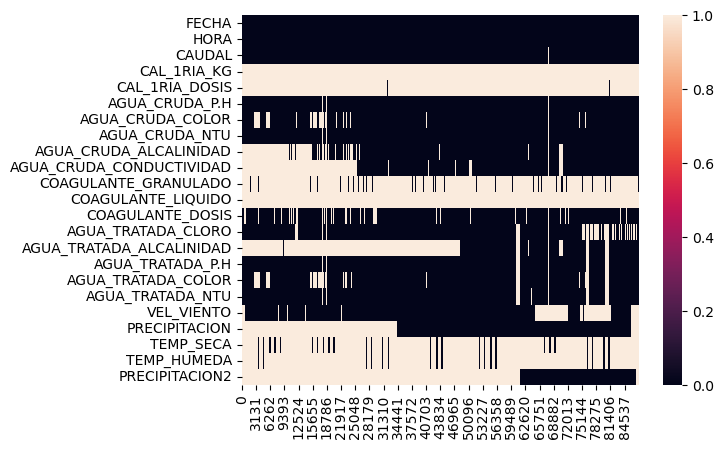

In [25]:
# Distribución de datos nulos en todo el dataframe
df_edit_completo.isnull().transpose().pipe(lambda df:(sns.heatmap(data=df)))
plt.show()

## Análisis de correlación

### Dataframe original sin datos de relleno

In [26]:
# Análisis de correlación para el dataframe original sin datos de relleno
columns = ['COAGULANTE_DOSIS','VEL_VIENTO','PRECIPITACION','TEMP_SECA','TEMP_HUMEDA']
filtro_primeros_años = df_completo['FECHA'].dt.year.isin([2013,2014,2015])
filtro_mitad= df_completo['FECHA'].dt.year.isin([2016, 2017, 2018, 2019])
filtro_ultimos_años = df_completo['FECHA'].dt.year.isin([2020, 2021, 2022])

Aquí estamos seleccionando algunas columnas para el análisis de correlación y estableciendo filtros para los primeros años, la mitad y los últimos años del conjunto de datos.

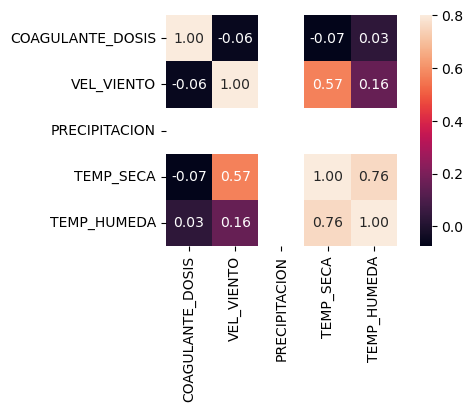

In [27]:
# Generamos matrices de correlación y las visualizamos para cada periodo de tiempo
# Primeros años del conjunto de datos.
corrmat = df_completo[filtro_primeros_años][columns].corr()
f, ax = plt.subplots(figsize=(6, 3))
sns.heatmap(corrmat, vmax=.8, annot = True, fmt = '.2f', annot_kws = {'size': 10}, square=True);

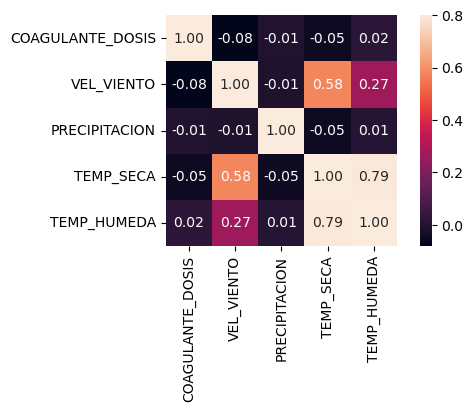

In [28]:
# Años de la mitad del conjunto de datos.
corrmat = df_completo[filtro_mitad][columns].corr()
f, ax = plt.subplots(figsize=(6, 3))
sns.heatmap(corrmat, vmax=.8, annot = True, fmt = '.2f', annot_kws = {'size': 10}, square=True);

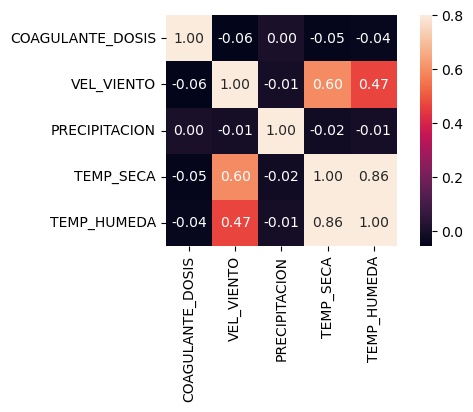

In [29]:
# Últimos años.
corrmat = df_completo[filtro_ultimos_años][columns].corr()
f, ax = plt.subplots(figsize=(6, 3))
sns.heatmap(corrmat, vmax=.8, annot = True, fmt = '.2f', annot_kws = {'size': 10}, square=True);

### Dataframe con datos de relleno

In [30]:
filtro_primeros_años = df_edit_completo['FECHA'].dt.year.isin([2013,2014,2015])
filtro_mitad= df_edit_completo['FECHA'].dt.year.isin([2016, 2017, 2018, 2019])
filtro_ultimos_años = df_edit_completo['FECHA'].dt.year.isin([2020, 2021, 2022])

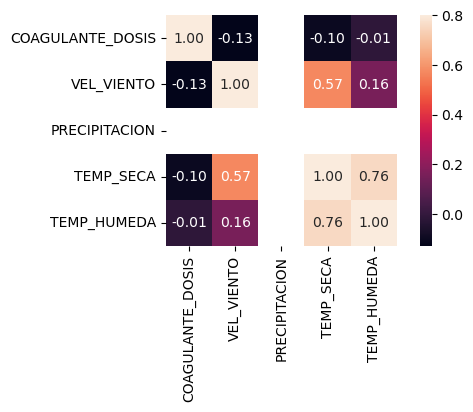

In [31]:
# Primeros años del conjunto de datos.
corrmat = df_edit_completo[filtro_primeros_años][columns].corr()
f, ax = plt.subplots(figsize=(6, 3))
sns.heatmap(corrmat, vmax=.8, annot = True, fmt = '.2f', annot_kws = {'size': 10}, square=True);

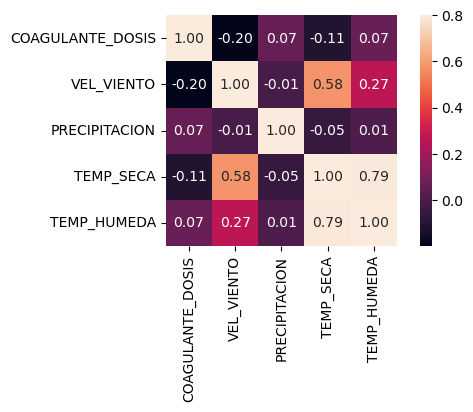

In [32]:
# Años de la mitad del conjunto de datos.
corrmat = df_edit_completo[filtro_mitad][columns].corr()
f, ax = plt.subplots(figsize=(6, 3))
sns.heatmap(corrmat, vmax=.8, annot = True, fmt = '.2f', annot_kws = {'size': 10}, square=True);

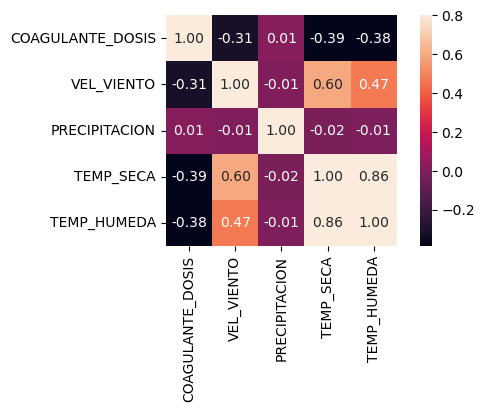

In [33]:
# Últimos años.
corrmat = df_edit_completo[filtro_ultimos_años][columns].corr()
f, ax = plt.subplots(figsize=(6, 3))
sns.heatmap(corrmat, vmax=.8, annot = True, fmt = '.2f', annot_kws = {'size': 10}, square=True);

## Análisis de correlación con datos de estación extra

### Dataframe original sin datos de relleno

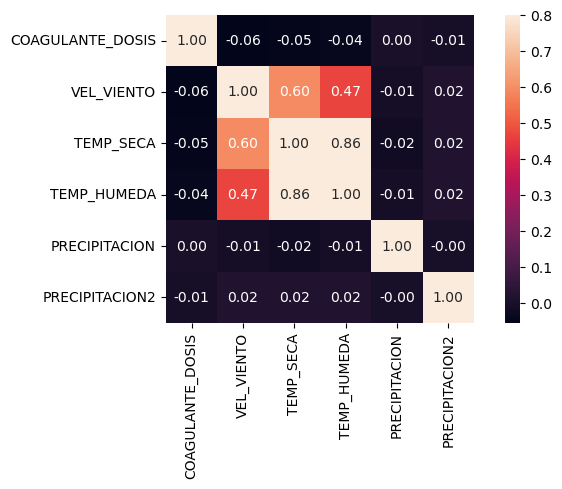

In [34]:
# Análisis de correlación con datos de estación extra
columns = ['COAGULANTE_DOSIS','VEL_VIENTO','TEMP_SECA','TEMP_HUMEDA','PRECIPITACION','PRECIPITACION2']
filtro_ultimos_años = df_completo['FECHA'].dt.year.isin([2020, 2021, 2022])
# Generamos la matriz de correlación y la visualizamos para el dataframe original sin datos de relleno
corrmat = df_completo[filtro_ultimos_años][columns].corr()
f, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(corrmat, vmax=.8, annot = True, fmt = '.2f', annot_kws = {'size': 10}, square=True);

### Dataframe con datos de relleno

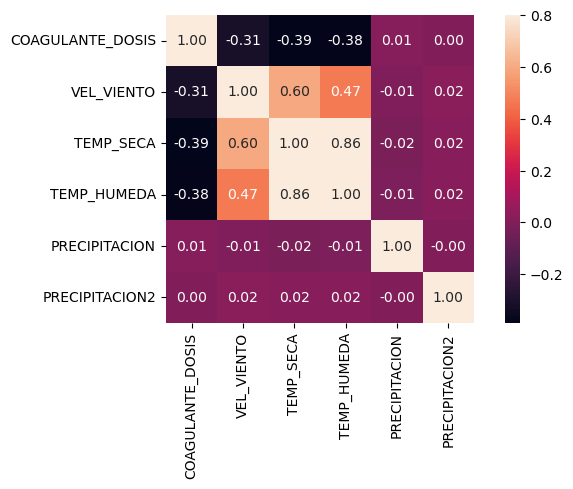

In [35]:
filtro_ultimos_años = df_edit_completo['FECHA'].dt.year.isin([2020, 2021, 2022])
# Generamos la matriz de correlación y la visualizamos para el dataframe con datos de relleno
corrmat = df_edit_completo[filtro_ultimos_años][columns].corr()
f, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(corrmat, vmax=.8, annot = True, fmt = '.2f', annot_kws = {'size': 10}, square=True);

In [36]:
df_edit_completo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87648 entries, 0 to 87647
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   FECHA                     87648 non-null  datetime64[ns]
 1   HORA                      87648 non-null  int64         
 2   CAUDAL                    87380 non-null  float64       
 3   CAL_1RIA_KG               29 non-null     float64       
 4   CAL_1RIA_DOSIS            587 non-null    float64       
 5   AGUA_CRUDA_P.H            86715 non-null  float64       
 6   AGUA_CRUDA_COLOR          81227 non-null  float64       
 7   AGUA_CRUDA_NTU            86984 non-null  float64       
 8   AGUA_CRUDA_ALCALINIDAD    68371 non-null  float64       
 9   AGUA_CRUDA_CONDUCTIVIDAD  60089 non-null  float64       
 10  COAGULANTE_GRANULADO      5897 non-null   float64       
 11  COAGULANTE_LIQUIDO        135 non-null    float64       
 12  COAGULANTE_DOSIS  